<a href="https://colab.research.google.com/github/surbhi2003nke/R_Programming/blob/main/R_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covariance and correlation

In [13]:
xdata <- c(2,4.4,3,3,2,2.2,2,4)
ydata <- c(1,4.4,1,3,2,2.2,2,7)
print(xdata)
print(ydata)

[1] 2.0 4.4 3.0 3.0 2.0 2.2 2.0 4.0
[1] 1.0 4.4 1.0 3.0 2.0 2.2 2.0 7.0


In [14]:
cov(xdata, ydata)

[1] 1.479286

In [15]:
cov(xdata, ydata) / (sd(xdata)*sd(ydata))

[1] 0.7713962

In [16]:
cor(xdata, ydata)

[1] 0.7713962

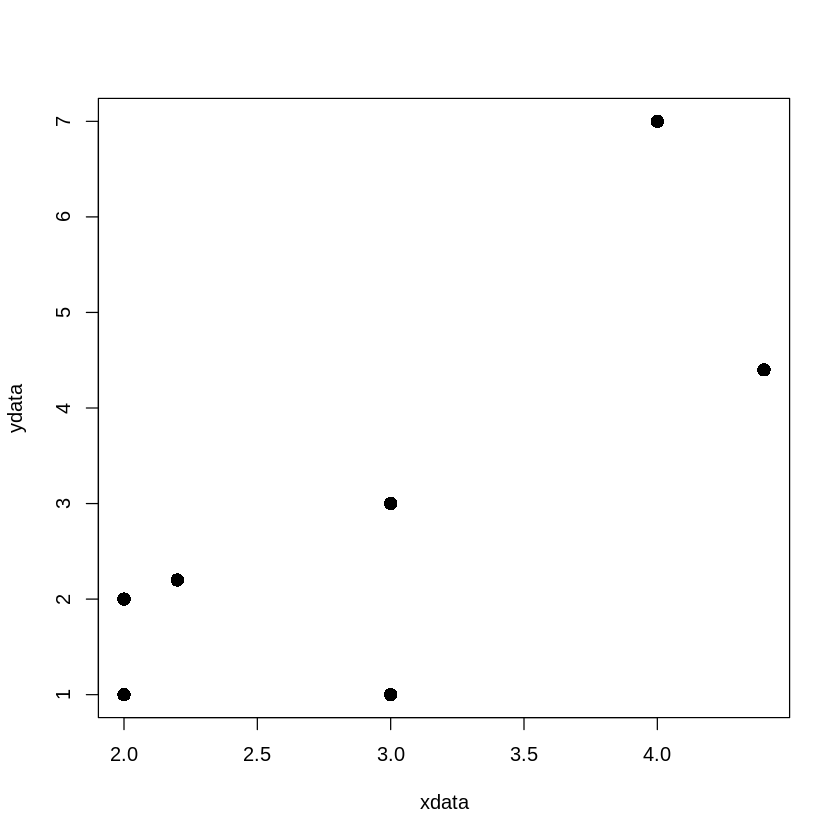

In [17]:
plot(xdata, ydata, pch=16, cex = 1.5)

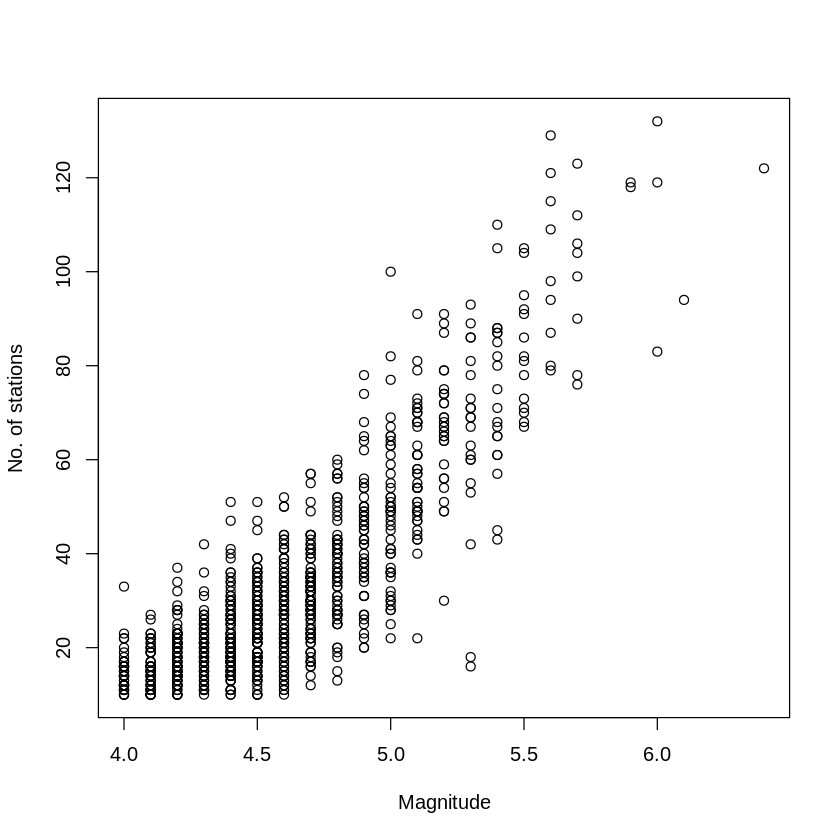

In [18]:
plot(quakes$mag, quakes$stations, xlab="Magnitude", ylab="No. of stations")

In [19]:
cov(quakes$mag, quakes$stations)

[1] 7.508181

In [20]:
cor(quakes$mag, quakes$stations)

[1] 0.8511824

outliers


In [21]:
foo <- c(0.6,-0.6, 0.1, -0.2, -1.0, 0.4,0.3, -1.8, 1.1, 6.0)

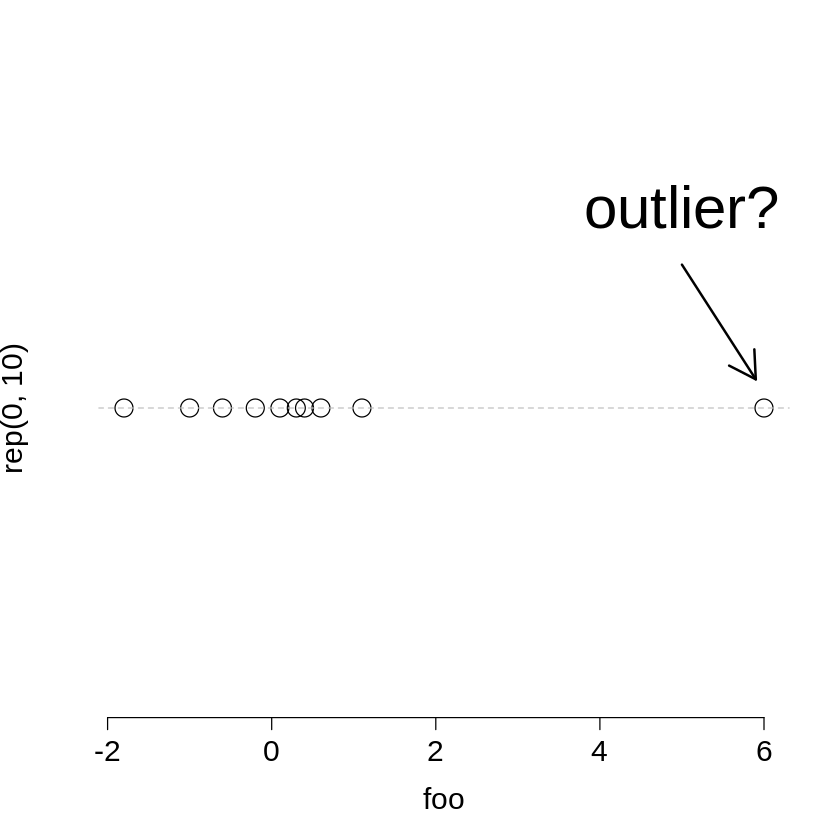

In [22]:
plot(foo, rep(0,10), yaxt = "n", bty="n", cex=2, cex.axis=1.5, cex.lab=1.5)
abline(h=0, col="gray", lty=2)
arrows(5,0.5, 5.9, 0.1, lwd=2)
text(5,0.7, labels="outlier?", cex=3)


In [23]:
bar <- c(0.1,0.3,1.3,0.6,0.2,-1.7,0.8,0.9,-0.8,-1.0)
baz <- c(-0.3,0.9,2.8,2.3,1.2,-4.1,-0.4,4.1,-2.3,-100.0)


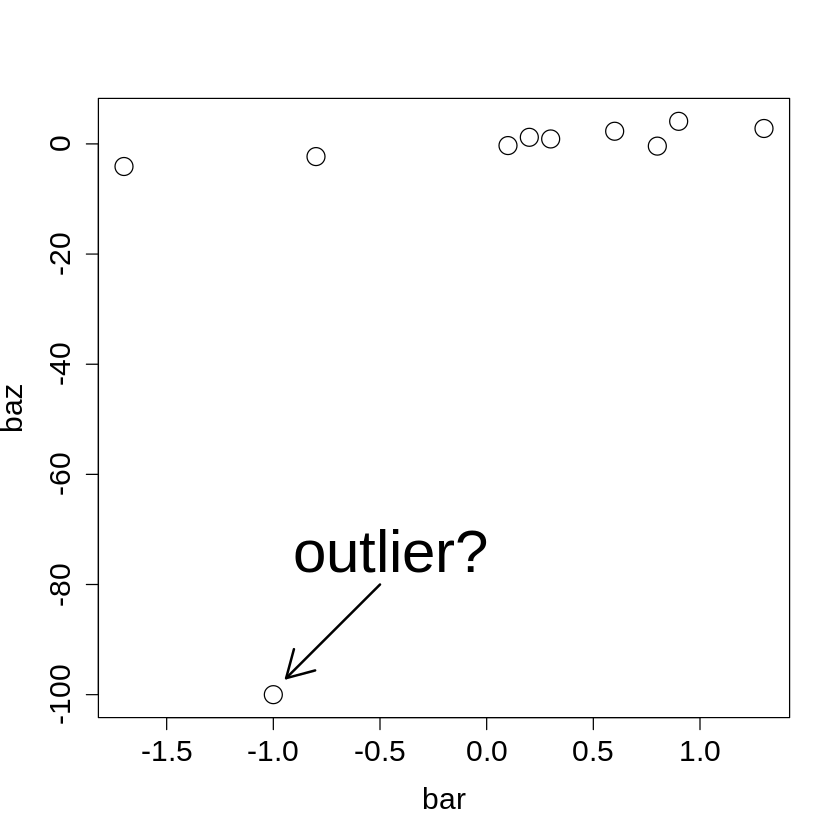

In [24]:
plot(bar, baz, axes=T, cex=2, cex.axis=1.5, cex.lab=1.5)
arrows(-0.5,-80,-0.94,-97, lwd=2)
text(-0.45,-74,labels="outlier?",cex=3)


In [25]:
mean(foo)

[1] 0.49

In [26]:
mean(foo[-10])

[1] -0.1222222

In [27]:
cor(bar, baz)

[1] 0.4566361

In [28]:
cor(bar[-10], baz[-10])

[1] 0.8898639

# Exercise 13.4

a.	In Exercise 7.1 (b) on page 139, you plotted height against weight measurements. Compute the correlation coefficient based on the observed data of these two variables.

b.	Another of R's built-in, ready-to-use data sets is mtcars, contain­ing a number of descriptive details on performance aspects of 32 automobiles.

1)	Ensure you can access this data frame by entering mtcars at the prompt. Then inspect its help file to get an idea of the types of data present.

In [30]:
data(mtcars)

In [31]:
?mtcars

In [32]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


2)  Two of the variables describe a vehicle's horsepower and shortest time taken to travel a quarter-mile distance. Using base R graphics, plot these two data vectors with horsepower on the x-axis and compute the correlation coefficient.

In [33]:
x=mtcars$hp
y=mtcars$qsec

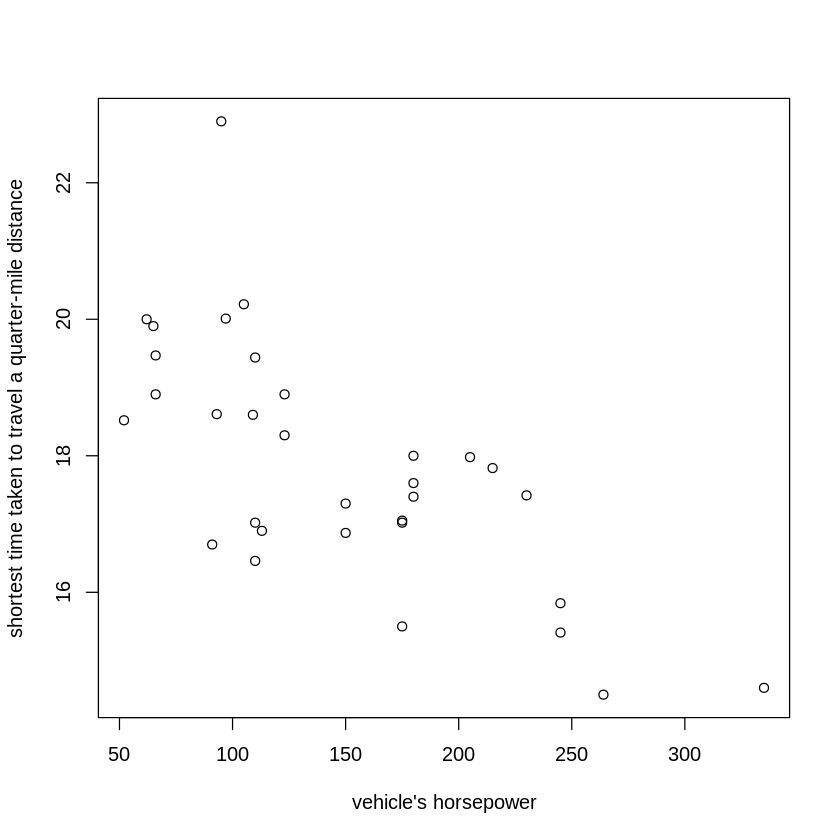

In [34]:
plot(x,y, xlab = "vehicle's horsepower", ylab = "shortest time taken to travel a quarter-mile distance")

In [35]:
cor(x,y)

[1] -0.7082234

3)  Identify the variable in mtcars that corresponds to transmis­ sion type. Use your knowledge of factors in R to create a new factor from this variable called tranfac, where manual cars should be labeled "manual" and	automatic cars "auto".

In [36]:
mtcars$tranfac = factor(mtcars$am, levels = c(0,1), labels = c("auto", "manual"))

In [37]:
mtcars$tranfac

[1] manual manual manual auto   auto   auto   auto   auto   auto   auto  
[11] auto   auto   auto   auto   auto   auto   auto   manual manual manual
[21] auto   auto   auto   auto   auto   manual manual manual manual manual
[31] manual manual
Levels: auto manual

4)  Now, use qplot from ggplot2 in conjunction with tranfac to produce the same scatterplot as in (ii) so that you're able to visually differentiate between manual and automatic cars.

In [38]:
# Load ggplot2 package
library(ggplot2)

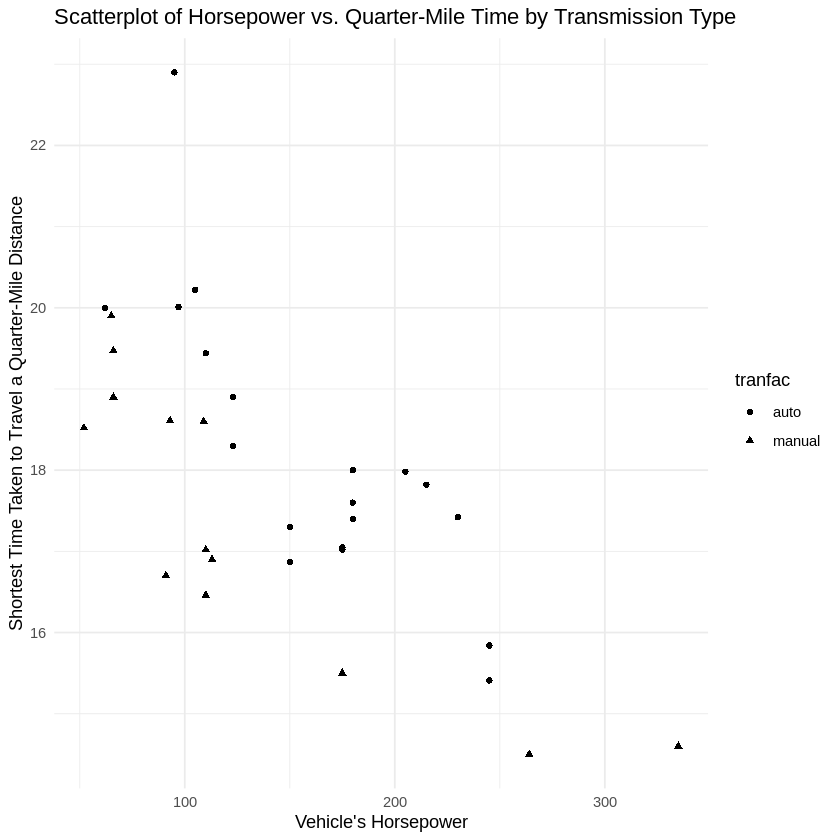

In [39]:
ggplot(data = mtcars, aes(x = hp, y = qsec, shape = tranfac)) + geom_point() + labs(x = "Vehicle's Horsepower", y = "Shortest Time Taken to Travel a Quarter-Mile Distance",
       title = "Scatterplot of Horsepower vs. Quarter-Mile Time by Transmission Type") + theme_minimal()

5)  Finally, compute separate correlation coefficients for horse­ power and quarter-mile time based on the transmission of the vehicles and, comparing these estimates with the overall value from (ii), briefly comment on what you note.

In [40]:
# Load the mtcars dataset
data(mtcars)

# Compute correlation coefficients for horsepower and quarter-mile time based on transmission type
cor_auto_hp <- cor(mtcars$hp[mtcars$am == 0], mtcars$qsec[mtcars$am == 0])
cor_manual_hp <- cor(mtcars$hp[mtcars$am == 1], mtcars$qsec[mtcars$am == 1])

# Display the correlation coefficients
cat("Correlation coefficient for automatic transmission (hp vs qsec):", cor_auto_hp, "\n")
cat("Correlation coefficient for manual transmission (hp vs qsec):", cor_manual_hp, "\n")

# Overall correlation coefficient for horsepower and quarter-mile time
cor_overall <- cor(mtcars$hp, mtcars$qsec)
cat("Overall correlation coefficient (hp vs qsec):", cor_overall, "\n")


Correlation coefficient for automatic transmission (hp vs qsec): -0.8040275 
Correlation coefficient for manual transmission (hp vs qsec): -0.8494566 
Overall correlation coefficient (hp vs qsec): -0.7082234 


Return to chickwts to complete the following tasks:

1)  Produce a plot like the left panel of Figure 13-7, based on the weights of chicks on the sunflower diet only. Note that one of the sunflower-fed chicks has a far lower weight than the others.

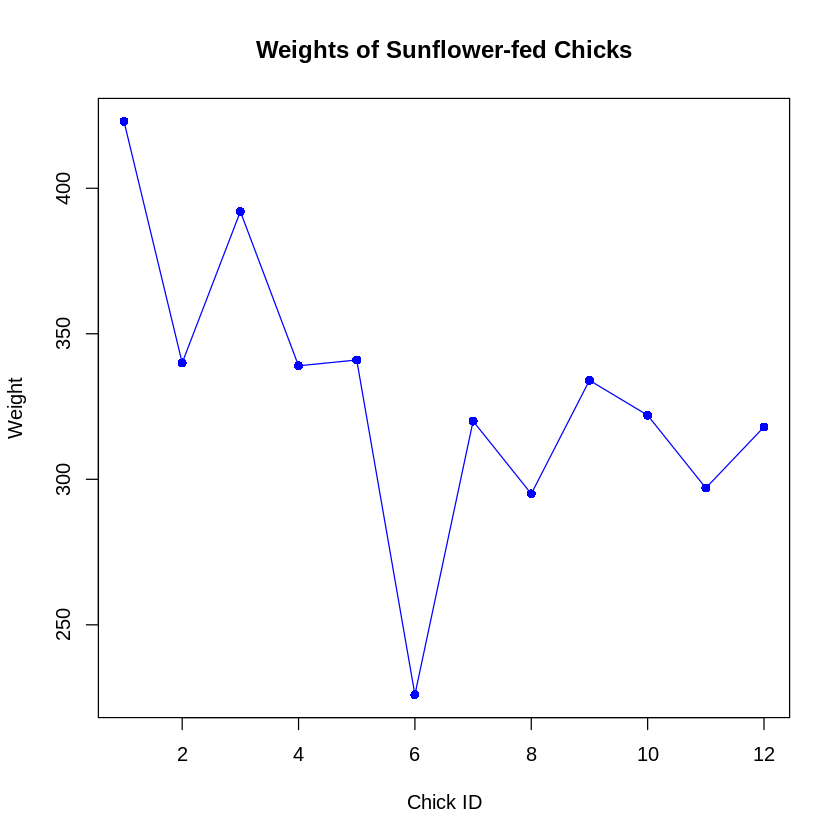

In [44]:
# Load the chickwts dataset
data(chickwts)

# Subset the data to include only chicks on the sunflower diet
sunflower_chicks <- subset(chickwts, feed == "sunflower")

# Plot the weights of sunflower-fed chicks
plot(sunflower_chicks$weight, type = "o", col = "blue", pch = 16,
     xlab = "Chick ID", ylab = "Weight", main = "Weights of Sunflower-fed Chicks")


2)  Compute the standard deviation and IQR of the weights of the sunflower-fed chicks.

In [45]:
# Compute standard deviation of weights
sd_sunflower <- sd(sunflower_chicks$weight)

# Compute IQR of weights
iqr_sunflower <- IQR(sunflower_chicks$weight)

# Print the standard deviation and IQR
cat("Standard Deviation of Sunflower-fed Chicks' Weights:", sd_sunflower, "\n")
cat("IQR of Sunflower-fed Chicks' Weights:", iqr_sunflower, "\n")


Standard Deviation of Sunflower-fed Chicks' Weights: 48.83638 
IQR of Sunflower-fed Chicks' Weights: 27.5 


3) Now, suppose you're told that the lowest weight of the sunflower-fed chicks was caused by a certain illness, irrelevant to your research. Delete this observation and recalculate the standard deviation and IQR of the remaining sunflower chicks. Briefly comment on the difference in calculated values.

In [46]:
# Find the index of the lowest weight observation
min_weight_index <- which.min(sunflower_chicks$weight)

# Remove the observation with the lowest weight
sunflower_chicks_cleaned <- sunflower_chicks[-min_weight_index, ]

# Recalculate standard deviation of weights
sd_sunflower_cleaned <- sd(sunflower_chicks_cleaned$weight)

# Recalculate IQR of weights
iqr_sunflower_cleaned <- IQR(sunflower_chicks_cleaned$weight)

# Print the updated standard deviation and IQR
cat("Standard Deviation of Sunflower-fed Chicks' Weights (After Cleaning):", sd_sunflower_cleaned, "\n")
cat("IQR of Sunflower-fed Chicks' Weights (After Cleaning):", iqr_sunflower_cleaned, "\n")


Standard Deviation of Sunflower-fed Chicks' Weights (After Cleaning): 38.31473 
IQR of Sunflower-fed Chicks' Weights (After Cleaning): 21.5 
